# Lab 4: Root finding

The first serious problem we will tackle is root finding. In this lab we'll implement two very simple algorithms, called the *bisection algorithm* and *regula falsi* ("false position") methods. For notes on the algorithms themselves, consult this week's cheat sheet or the lecture slides on QM+.  There are also links to the module texts that can serves for references for the methods.

Listed below are some code fragments to get started with in writing code to find roots.  There are several different root finding methods we will explore.  Each methods has different strengths and weakness and can fail in different ways.  A deliberate part of this exercise is understanding these strengths and weaknesses so that the algorithms can be used effectively.

A reminder that **you should follow bold instructions**, evaluate cells containing code unless otherwise instructed, and be ready to discuss your work at the checkpoints (&#9654;).

**Please enter your name and student number in the markdown cell below** then press `Shift` + `Enter`.

* Name: Saashiv Valjee
* SID: 190288688

## The bisection algorithm

Recall that this takes as input a function $f$ and range $(l, u)$ such that $f(l)$ and $f(u)$ have opposite signs. We *bisect* the range – that is, find the middle, $m$ – and depending on the sign of $f(m)$, locate the root in either the lower half $(l, m)$ or upper half $(m, u)$ of the original range:

![bisection.png](attachment:bisection.png)

Let's write a function to perform one step of this algorithm. **Complete the half-written code for this function below.**

In [4]:
def bisection_step(f, bounds):

    Xl, Xu = bounds
    f(Xu)*f(Xl) < 0

    Xm = (Xu + Xl) / 2

    if Xl * Xm < 0:
        Xu = Xm

    elif Xl * Xm > 0:
        Xl = Xm

    elif Xl * Xm == 0:
        Root = Xm


In order to test this out, we'll need a suitable test function. Let's try a really simple one where we know the answer: $f(x) = x^2 - 4$, which of course has roots at $x = \pm2$:

In [5]:
def f(x):
    return x**2 - 4

The first step in root finding is always getting a sense of the function and knowing roughly where roots, and any pathological aspects of the function (e.g., discontinuities, asymptotes) are.  To get started **Plot this function in the range $(0,5)$.**

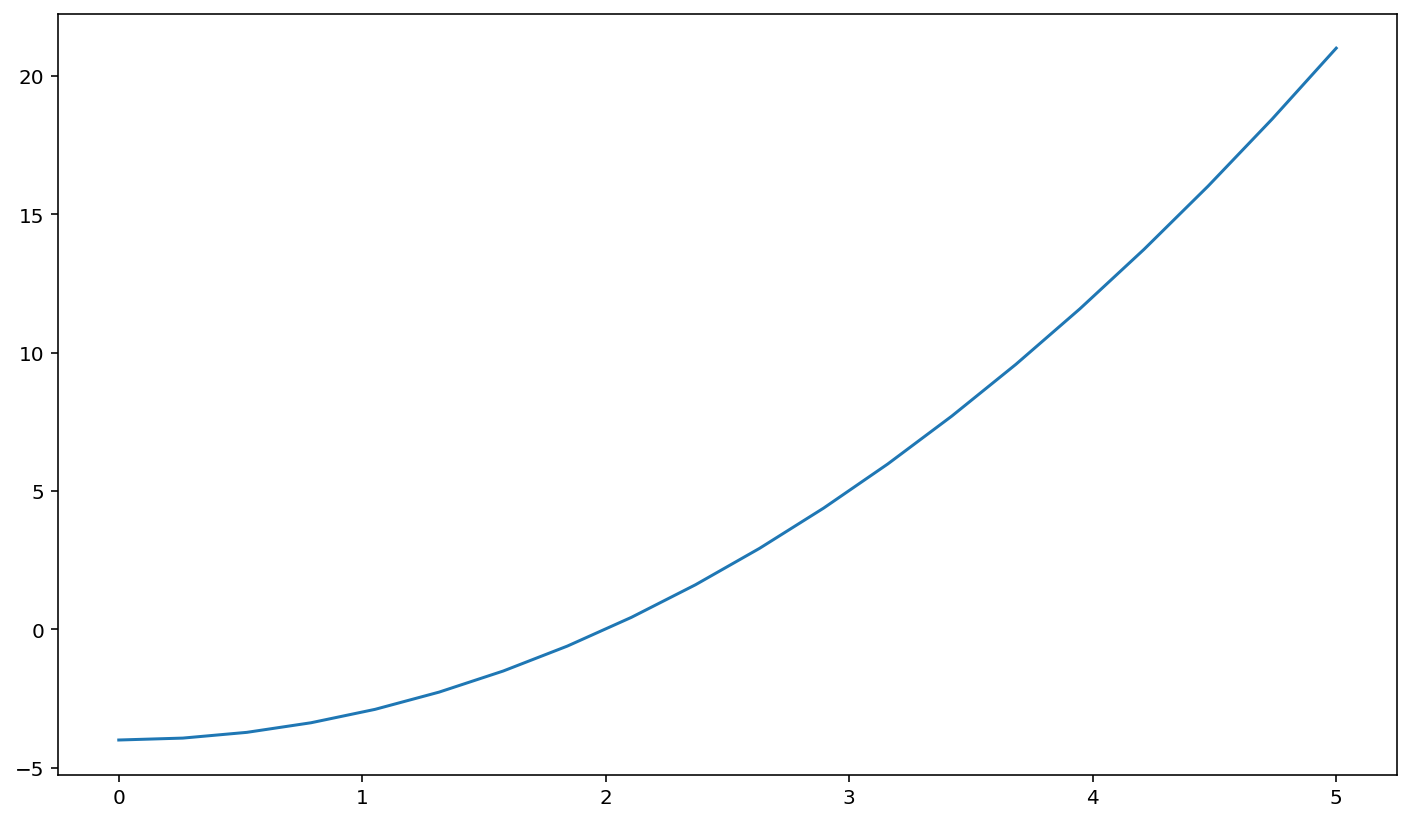

In [6]:
from matplotlib.pyplot import figure, plot, grid
from numpy import linspace
%
x = linspace(0, 5, 20)
y = f(x)
figure()
plot(x,y)

**Insert an appropriate loop command** in the code below to perform 20 steps of this algorithm on our newly defined $f(x)$, starting from the range $(0,5)$ and printing out the new range at each step.

[0. 1. 2. 3. 4. 5.]
[-4. -3.  0.  5. 12. 21.]
1 : bounds:  (0, 2.5)
2 : bounds:  (1.25, 2.5)
3 : bounds:  (1.875, 2.5)
4 : bounds:  (1.875, 2.1875)
5 : bounds:  (1.875, 2.03125)
6 : bounds:  (1.953125, 2.03125)
7 : bounds:  (1.9921875, 2.03125)
8 : bounds:  (1.9921875, 2.01171875)
9 : bounds:  (1.9921875, 2.001953125)
10 : bounds:  (1.9970703125, 2.001953125)
11 : bounds:  (1.99951171875, 2.001953125)
12 : bounds:  (1.99951171875, 2.000732421875)
13 : bounds:  (1.99951171875, 2.0001220703125)
14 : bounds:  (1.99981689453125, 2.0001220703125)
15 : bounds:  (1.999969482421875, 2.0001220703125)
16 : bounds:  (1.999969482421875, 2.0000457763671875)
17 : bounds:  (1.999969482421875, 2.0000076293945312)
18 : bounds:  (1.9999885559082031, 2.0000076293945312)
19 : bounds:  (1.9999980926513672, 2.0000076293945312)
20 : bounds:  (1.9999980926513672, 2.000002861022949)


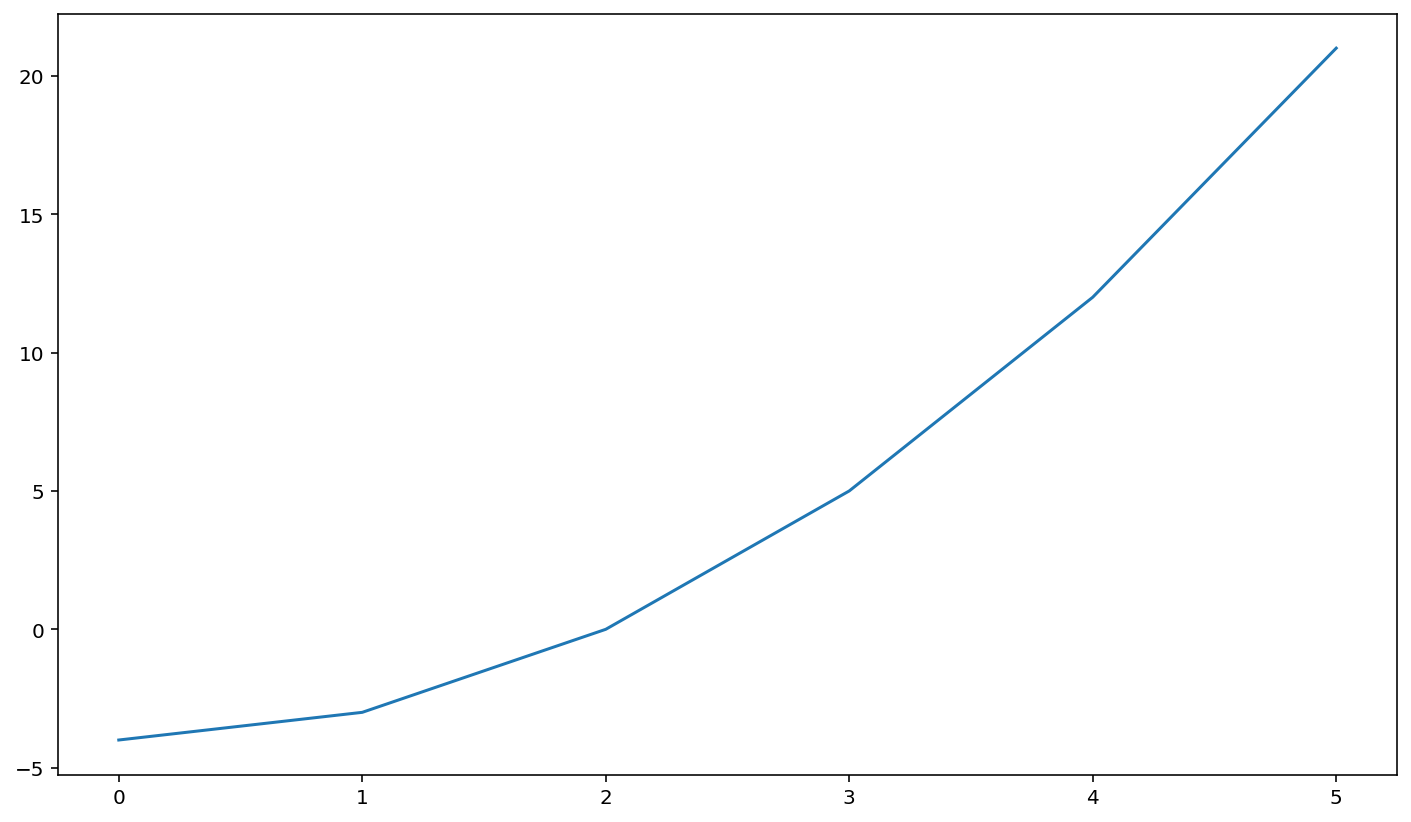

In [7]:
from matplotlib.pyplot import figure, plot
from numpy import linspace

def bisection_step(f, bounds):
    
    Xl, Xu = bounds
    f(Xu)*f(Xl) < 0
    
    Xm = (Xu + Xl) / 2
    
    if f(Xl) * f(Xm) < 0:
        Xu = Xm
        return (Xl, Xu)
        
    elif f(Xl) * f(Xm) > 0:
        Xl = Xm
        return (Xl, Xu)
        
    elif f(Xl) * f(Xm) == 0:
        Root = Xm
        return Root
        
def f(x):
    return x**2 - 4


x = linspace(0, 5, 6)
y = f(x)
print(x)
print(y)
figure()
plot(x,y)

#range
l, u = 0, 5

#initialise changeable bounds variable
bounds = bisection_step(f, (l, u))
print(1, ': bounds: ', bounds)

#counter
n = 1

while n < 20:
    n = n + 1
    bounds = bisection_step(f, bounds)
    print(n, ': bounds: ', bounds)
    

**Does the width of the range change as expected at each step? Does the algorithm converge to the known root?**

**Now write another loop along the same lines, but this time stopping only when the range is smaller than a set tolerance (say $10^{-8}$). How many iterations does this take, starting from $(0, 5)$?  Is this the number of iterations that you would predict from the algorithm?**

[0. 1. 2. 3. 4. 5.]
[-4. -3.  0.  5. 12. 21.]
1 : bounds:  (2.5, 0)
1 : bounds:  (1.25, 2.5)
2 : bounds:  (2.5, 1.875)
3 : bounds:  (1.875, 2.1875)
4 : bounds:  (2.03125, 1.875)
5 : bounds:  (1.953125, 2.03125)
6 : bounds:  (2.03125, 1.9921875)
7 : bounds:  (1.9921875, 2.01171875)
8 : bounds:  (2.001953125, 1.9921875)
9 : bounds:  (1.9970703125, 2.001953125)
10 : bounds:  (2.001953125, 1.99951171875)
11 : bounds:  (1.99951171875, 2.000732421875)
12 : bounds:  (2.0001220703125, 1.99951171875)
13 : bounds:  (1.99981689453125, 2.0001220703125)
14 : bounds:  (2.0001220703125, 1.999969482421875)
15 : bounds:  (1.999969482421875, 2.0000457763671875)
16 : bounds:  (2.0000076293945312, 1.999969482421875)
17 : bounds:  (1.9999885559082031, 2.0000076293945312)
18 : bounds:  (2.0000076293945312, 1.9999980926513672)
19 : bounds:  (1.9999980926513672, 2.000002861022949)
20 : bounds:  (2.000000476837158, 1.9999980926513672)
21 : bounds:  (1.9999992847442627, 2.000000476837158)
22 : bounds:  (2.00000

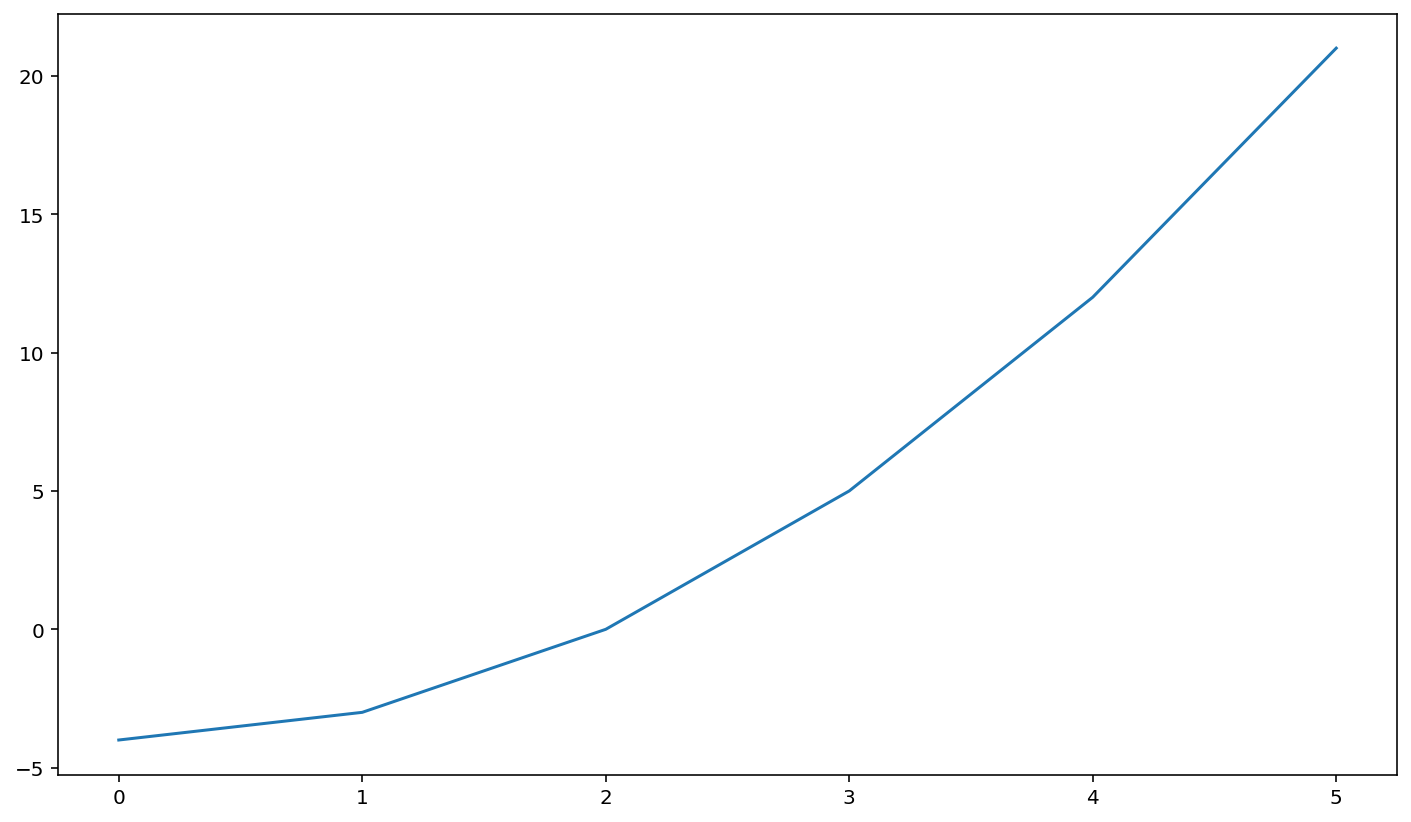

In [8]:
from matplotlib.pyplot import figure, plot
from numpy import linspace

def bisection_step(f, bounds):
    
    Xu, Xl = bounds
    f(Xu)*f(Xl) < 0
    
    Xm = (Xu + Xl) / 2
    
    if f(Xl) * f(Xm) < 0:
        Xu = Xm
        return (Xl, Xu)
        
    elif f(Xl) * f(Xm) > 0:
        Xl = Xm
        return (Xl, Xu)
        
    elif f(Xl) * f(Xm) == 0:
        Root = Xm
        return Root
        
def f(x):
    return x**2 - 4


x = linspace(0, 5, 6)
y = f(x)
print(x)
print(y)
figure()
plot(x,y)

l, u = 0, 5

bounds = bisection_step(f, (l, u))
print(1, ': bounds: ', bounds)

n = 1
while (max(bounds) - min(bounds)) > 10**(-8):
    bounds = bisection_step(f, bounds)
    print(n, ': bounds: ', bounds)
    n = n + 1

&#9654; **CHECKPOINT 1**

## *Regula falsi*

This algorithm is very similar but tries to make a more sensible guess at the root than simply the midpoint of the range. Instead, we calculate the intersection point of a straight line through $(l, f(l))$ and $(u, f(u))$, which turns out to be
$$
m = \frac{lf(u) - uf(l)}{f(u)-f(l)}:
$$

![regulafalsi.png](attachment:regulafalsi.png)

**In the same way as above, write a function to perform one step of this algorithm.**

In [9]:
def Regula_falsi(f, bounds):
    
    Xl, Xu = bounds
    f(Xu)*f(Xl) < 0
    
    Xm = (Xl*f(Xu) - Xu*f(Xl))/(f(Xu) - f(Xl))
    
    if f(Xl) * f(Xm) < 0:
        Xu = Xm
        return (Xl, Xu)
        
    elif f(Xl) * f(Xm) > 0:
        Xl = Xm
        return (Xl, Xu)
        
    elif f(Xl) * f(Xm) == 0:
        Root = Xm
        return Root


Unlike the bisection algorithm, the size of the range in *regula falsi* is not guaranteed to converge to zero. So to test whether the calculation is complete, we should check whether we've found a root by checking the value of $f$ at both endpoints.

**Write a loop using *regula falsi* that repeats until $|f(l)|$ or $|f(u)|$ is less than $10^{-8}$. How many iterations are needed to solve $x^2 - 4 = 0$ starting from the range $(0, 5)$? Is *regula falsi* more efficient than the bisection rule in this case?**

In [10]:
def f(x):
    return x**2 - 4

bounds = Regula_falsi(f, (0, 5))
n = 1
print(n, ': bounds: ', bounds)

while abs(f(max(bounds))) > 10**(-8) and abs(f(min(bounds))) > 10**(-8):
  bounds = Regula_falsi(f, bounds)
  n = n + 1
  print(n, ': bounds: ', bounds)

1 : bounds:  (0.8, 5)
2 : bounds:  (1.3793103448275863, 5)
3 : bounds:  (1.7081081081081082, 5)
4 : bounds:  (1.8694601128122486, 5)
5 : bounds:  (1.9429912023460412, 5)
6 : bounds:  (1.9753670445521971, 5)
7 : bounds:  (1.989405737953084, 5)
8 : bounds:  (1.9954527198259269, 5)
9 : bounds:  (1.9980498988316284, 5)
10 : bounds:  (1.999164009461251, 5)
11 : bounds:  (1.999641675546843, 5)
12 : bounds:  (1.999846424515811, 5)
13 : bounds:  (1.99993418049131, 5)
14 : bounds:  (1.9999717913738932, 5)
15 : bounds:  (1.999987910540093, 5)
16 : bounds:  (1.999994818793949, 5)
17 : bounds:  (1.9999977794814774, 5)
18 : bounds:  (1.9999990483489027, 5)
19 : bounds:  (1.999999592149474, 5)
20 : bounds:  (1.9999998252069073, 5)
21 : bounds:  (1.9999999250886726, 5)
22 : bounds:  (1.999999967895145, 5)
23 : bounds:  (1.9999999862407762, 5)
24 : bounds:  (1.9999999941031898, 5)
25 : bounds:  (1.9999999974727958, 5)
26 : bounds:  (1.9999999989169126, 5)


▶ **CHECKPOINT 2**

**Now explore the behaviour of each of these two methods for finding roots.** You might like to consider the following questions:

- Which functions can they be applied to? 
- Can you predict how many iterations they will require? 
- Is it possible that they will not converge? 
- Is it possible that they will converge to a value that is not a root?
- Is it possible that there is a root within the initial range that they do not find?

To help your exploration, you might like to look at the following functions, although you should of course also try others that you invent yourself:
- $g(x) = x^8 - 2x - 1$
- $h(x) = \dfrac{x-1}{x-2}$
- $j(x) = x^3 + 47x^2 - 148x + 90$
- $k(x) = x^4 - 8x^3 + 22x^2 - 24x + 9$

You may want to plot these functions to see where the root are roughly and help you answer the questions.

In [60]:
#CHOOSING THE RIGHT METHOD

from matplotlib.pyplot import figure, plot, grid
from numpy import linspace

def f(x):
  #does, does, doesnt? wrong range? , does (falsi)
  #return x**8 - x*2 - 1
  #return (x-1)/(x-2)
  #return x**3 + 47*x**2 - 148*x + 90
  #return x**4 - 8*x**3 + 22*x**2 - 24*x + 9

l, u = 0, 10
list_of_numbers = []

for i in range (l, u):
  list_of_numbers.append(f(i))

print(list_of_numbers)
if min(list_of_numbers) < 0:
  print('BISECTION STEP')

  bounds = bisection_step(f, (l, u))
  print(1, ': bounds: ', bounds)

  n = 1
  while (max(bounds) - min(bounds)) > 10**(-8):
    bounds = bisection_step(f, bounds)
    print(n, ': bounds: ', bounds)
    n = n + 1

else:
  print('REGULA FALSI')

  bounds = Regula_falsi(f, (l, u))
  n = 1
  print(n, ': bounds: ', bounds)

  while abs(f(max(bounds))) > 10**(-8) and abs(f(min(bounds))) > 10**(-8):
    bounds = Regula_falsi(f, bounds)
    n = n + 1
    print(n, ': bounds: ', bounds)
    if n > 1000:
      break

x = linspace(0, 10, 11)
y = f(x)
figure()
grid()
plot(x,y)

ZeroDivisionError: division by zero

▶ **CHECKPOINT 3**

## Extension

You will have seen in your exploration that the bisection and *regula falsi* algorithms are complementary: they work well in different ways and in different situations. **Invent a hybrid method that implements an appropriate combination of these steps.** Can you find an algorithm that is better (say, converges faster) than either the bisection or *regula falsi* methods individually?

In [42]:
#CHOOSING THE RIGHT METHOD

from matplotlib.pyplot import figure, plot, grid
from numpy import linspace

def f(x):
  #does, does, doesnt? wrong range? , does (falsi)
  #return x**8 - x*2 - 1
  #return (x-1)/(x-2)
  #return x**3 + 47*x**2 - 148*x + 90
  #return x**4 - 8*x**3 + 22*x**2 - 24*x + 9
    
l, u = 0, 10
list_of_numbers = []

for i in range (l, u):
  list_of_numbers.append(f(i))

print(list_of_numbers)
if min(list_of_numbers) < 0:
  print('BISECTION STEP')

  bounds = bisection_step(f, (l, u))
  print(1, ': bounds: ', bounds)

  n = 1
  while (max(bounds) - min(bounds)) > 10**(-8):
    bounds = bisection_step(f, bounds)
    print(n, ': bounds: ', bounds)
    n = n + 1
    
else:
  print('REGULA FALSI')
  
  bounds = Regula_falsi(f, (l, u))
  n = 1
  print(n, ': bounds: ', bounds)

  while abs(f(max(bounds))) > 10**(-8) and abs(f(min(bounds))) > 10**(-8):
    bounds = Regula_falsi(f, bounds)
    n = n + 1
    print(n, ': bounds: ', bounds)
    if n > 1000: 
      break
  
x = linspace(0, 10, 11)
print(f)
y = f(x)
figure()
grid()
plot(x,y)
  



ZeroDivisionError: division by zero

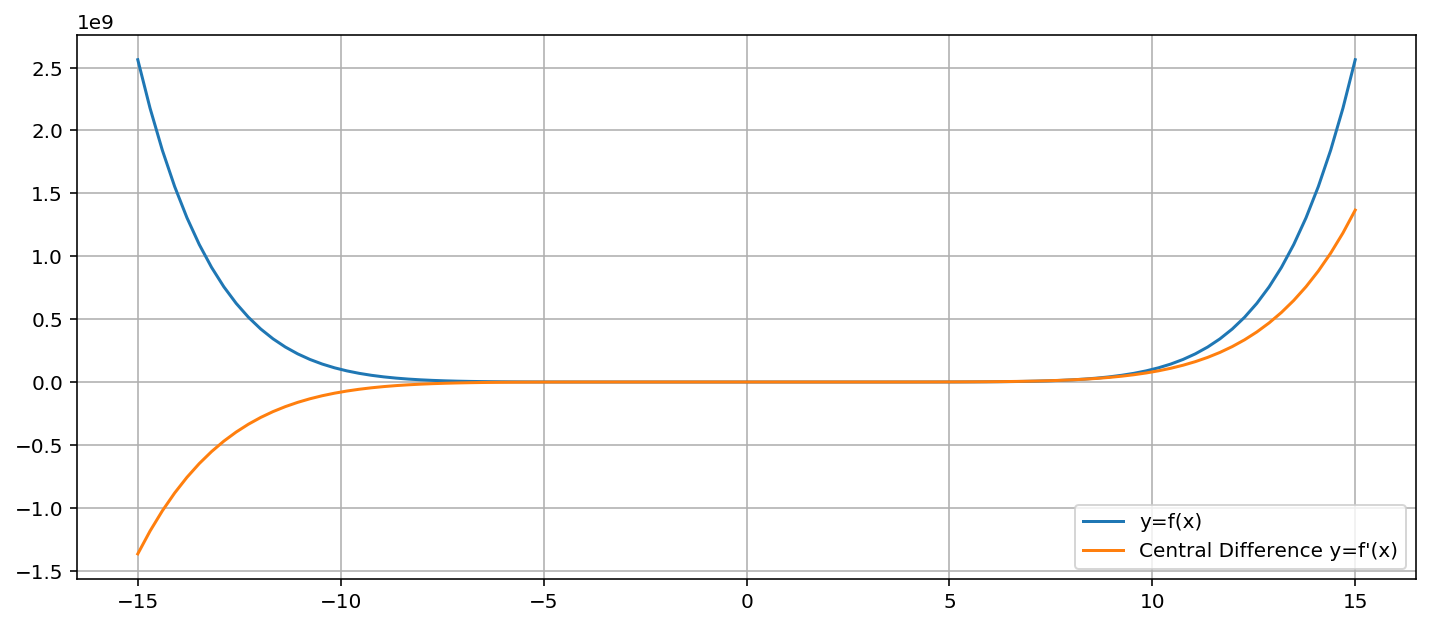

In [34]:
#not newton
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def derivative(f,a,method='central',h=0.01):

    if method == 'central':
        return (f(a + h) - f(a - h))/(2*h)
    elif method == 'forward':
        return (f(a + h) - f(a))/h
    elif method == 'backward':
        return (f(a) - f(a - h))/h
    else:
        raise ValueError("Method must be 'central', 'forward' or 'backward'.")

l, u = -15,15
x = np.linspace(l,u,100)
f = lambda x: x**8 - x*2 - 1
y = f(x)
dydx = derivative(f,x)
plt.figure(figsize=(12,5))
plt.plot(x,y,label='y=f(x)')
plt.plot(x,dydx,label="Central Difference y=f'(x)")
plt.legend()
plt.grid(True)

plt.show()

In [32]:
#newton
import numpy as np
from numpy import tan
import matplotlib.pyplot as plt
%matplotlib inline

def derivative(f,a,method='central',h=0.01):
    if method == 'central':
        return (f(a + h) - f(a - h))/(2*h)
    elif method == 'forward':
        return (f(a + h) - f(a))/h
    elif method == 'backward':
        return (f(a) - f(a - h))/h
    else:
        raise ValueError("Method must be 'central', 'forward' or 'backward'.")

guess = 1
f = lambda x: x**8 - x*2 - 1 + x**4 - 8*x**3 + 22*x**2 - 24*x + 9
y = f(x)
x = guess - f(guess)/derivative(f,guess)
prev_x = 0
n = 0
while f(x) != 0:
  n = n + 1
  x = x - f(x)/derivative(f,x)

print(x)
print(n, 'steps')

1.1578982109459794
7 steps


have either bisection/regula go no more then afew times to find a general location of the function, use the x value they finish with as x0 in newtons method?

In [0]:
#return x**8 - x*2 - 1
  #return (x-1)/(x-2)
  #return x**3 + 47*x**2 - 148*x + 90
  #return x**4 - 8*x**3 + 22*x**2 - 24*x + 9